In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Sheet_1.csv")

In [4]:
df.shape

(80, 8)

In [5]:
df.head()

,response_id,class,response_text,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,response_1,not_flagged,I try and avoid this sort of conflict,NaN,NaN,NaN,NaN,NaN
1,response_2,flagged,Had a friend open up to me about his mental ad...,NaN,NaN,NaN,NaN,NaN
2,response_3,flagged,I saved a girl from suicide once. She was goin...,NaN,NaN,NaN,NaN,NaN
3,response_4,not_flagged,i cant think of one really...i think i may hav...,NaN,NaN,NaN,NaN,NaN
4,response_5,not_flagged,Only really one friend who doesn't fit into th...,,NaN,NaN,NaN,NaN


In [10]:
df = df.drop(columns=["response_id", "Unnamed: 3", "Unnamed: 4", "Unnamed: 5", "Unnamed: 6", "Unnamed: 7"])

In [11]:
df.shape

(80, 2)

In [12]:
df.head()

,class,response_text
0,not_flagged,I try and avoid this sort of conflict
1,flagged,Had a friend open up to me about his mental ad...
2,flagged,I saved a girl from suicide once. She was goin...
3,not_flagged,i cant think of one really...i think i may hav...
4,not_flagged,Only really one friend who doesn't fit into th...


In [13]:
df.isna().sum()

class            0
response_text    0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   class          80 non-null     object
 1   response_text  80 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [15]:
from sklearn.preprocessing import LabelEncoder

In [17]:
df["class"] = LabelEncoder().fit_transform(df["class"])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   class          80 non-null     int32 
 1   response_text  80 non-null     object
dtypes: int32(1), object(1)
memory usage: 1.1+ KB


In [19]:
df.head()

,class,response_text
0,1,I try and avoid this sort of conflict
1,0,Had a friend open up to me about his mental ad...
2,0,I saved a girl from suicide once. She was goin...
3,1,i cant think of one really...i think i may hav...
4,1,Only really one friend who doesn't fit into th...


<AxesSubplot:xlabel='class', ylabel='count'>

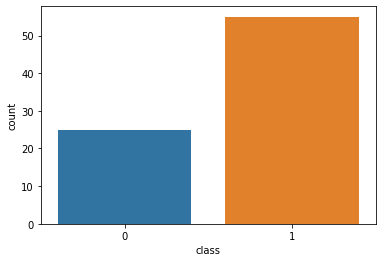

In [20]:
sns.countplot(data=df, x="class")

In [21]:
df.shape

(80, 2)

In [24]:
for c in df[df["class"] == 1]["response_text"].iloc[:5]:
    print(c + "\n")

I try and avoid this sort of conflict

i cant think of one really...i think i may have indirectly

Only really one friend who doesn't fit into the any of the above categories. Her therapist calls it spiraling." Anyway she pretty much calls me any time she is frustrated by something with  her boyfriend to ask me if it's logical or not. Before they would just fight and he would call her crazy. Now she asks me if it's ok he didn't say "please" when he said  "hand me the remote."

a couple of years ago my friends was going to switch school because of low self esteem too. I helped him overcome that shit too

Listened to someone talk about relationship troubles. Offered some advice from personal experience.



In [25]:
for c in df[df["class"] == 0]["response_text"].iloc[:5]:
    print(c + "\n")

Had a friend open up to me about his mental addiction to weed and how it was taking over his life and making him depressed

I saved a girl from suicide once. She was going to swallow a bunch of pills and I talked her out of it in a very calm, loving way.

Roommate when he was going through death and loss of a gf. Did anything to get him out of his bedroom.

i've had a couple of friends (you could say more than friends) with quite severe depression/ emotional problems. i helped for a while but eventually both relationships started to suffer as a result of both our personal problems

I will always listen. I comforted my sister when she lost her virgity the same night she walked in on her boyfriend cutting himself, and then our parents found out she threw a house part. Simply bring supportive was my focus.



In [26]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
x, y = df["response_text"].values, df["class"].values

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [33]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
import string

In [36]:
example_response_text = df["response_text"].iloc[0]
tokens = word_tokenize(example_response_text)
tokens_without_punctuation = [i for i in tokens if i not in string.punctuation]
stop_words = stopwords.words()
tokens_without_punctuation_and_stop_words = [i for i in tokens_without_punctuation if i not in stop_words]
stemmer = SnowballStemmer(language="english")
stemmed_tokens = [stemmer.stem(i) for i in tokens_without_punctuation_and_stop_words]

In [37]:
example_response_text

'I try and avoid this sort of conflict'

In [38]:
stemmed_tokens

['i', 'tri', 'avoid', 'sort', 'conflict']

In [39]:
stopwords = stopwords.words()
stemmer = SnowballStemmer(language="english")

In [40]:
def process_response(response: str):
    tokens = word_tokenize(response)
    tokens_without_punctuation = [i for i in tokens if i not in string.punctuation]
    tokens_without_punctuation_and_stop_words = [i for i in tokens_without_punctuation if i not in stop_words]
    stemmed_tokens = [stemmer.stem(i) for i in tokens_without_punctuation_and_stop_words]
    return stemmed_tokens

In [41]:
process_response(df["response_text"].iloc[0])

['i', 'tri', 'avoid', 'sort', 'conflict']

In [42]:
vectorizer = TfidfVectorizer(tokenizer=lambda x: process_response(x))

In [43]:
features = vectorizer.fit_transform(df["response_text"])

In [45]:
vectorizer.get_feature_names_out()

array(["''", "'d", "'m", "'s", '..', '...', '1n', '2', '5', '50+', '``',
       'abl', 'absolut', 'acquaint', 'act', 'action', 'activ', 'addict',
       'adequ', 'admit', 'advic', 'advis', 'age', 'ago', 'agoni',
       'alcohol', 'allow', 'almost', 'alon', 'along', 'alreadi',
       'although', 'alway', 'anniversari', 'anoth', 'answer', 'anxieti',
       'anxious', 'anyon', 'anyth', 'anyway', 'appos', 'around', 'ask',
       'attent', 'aunt', 'avoid', 'away', 'back', 'bad', 'basic',
       'bedroom', 'best', 'better', 'big', 'bit', 'blow', 'blue', 'blunt',
       'book', 'boyfriend', 'break', 'bring', 'brother', 'brought',
       'bunch', 'call', 'calm', 'came', 'camp', 'camping/surf', 'campsit',
       'cancer', 'cant', 'car', 'care', 'categori', 'caught', 'caus',
       'chanc', 'chang', 'chat', 'circumst', 'clean', 'cocain', 'come',
       'comfort', 'commit', 'common', 'complet', 'concern', 'confin',
       'conflict', 'convinc', 'cop', 'cope', 'could', 'counselor',
       'countle

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [47]:
pipe = Pipeline([("vectorizer", TfidfVectorizer(tokenizer=lambda x: process_response(x))), ("model", LogisticRegression())])

In [48]:
model = pipe.fit(x_train, y_train)

In [49]:
predictions = model.predict(x_test)

In [56]:
from sklearn.metrics import precision_score, recall_score

In [57]:
precision_score(y_test, predictions)

0.7916666666666666

In [58]:
recall_score(y_test, predictions)

1.0

In [59]:
lr_params = {"penalty": ["l1", "l2", "elasticnet", "none"], "C": [0.1, 1, 10]}

In [61]:
pipe = Pipeline([("vectorizer", TfidfVectorizer(tokenizer=lambda x: process_response(x))),
                 ("model", GridSearchCV(LogisticRegression(), lr_params))])